In [1]:
import csv, os
import numpy as np
import Helpers, src

In [2]:
covidFile = open("owid-covid-data.csv")
covidReader = csv.reader(covidFile)
myList = list(covidReader)
myList = Helpers.removeEmptyLists(myList)  # Remove empty rows from csv file
#print(myList[0][1])  # continent column
#print(myList[0][3])  # date column
#print(myList[0][4])  # total cases column
#print(myList[0][7])  # total deaths column

In [3]:
years = ['2020', '2021']
continents = ['Asia', 'Africa', 'North America', 'South America', 'Europe']

months_list = ['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
               '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
               '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
               '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12']  # Date format for Tableau

months_labels = ['Jan', '', 'Mar', '', 'May', '',
                 'Jul', '', 'Sep', '', 'Nov', '',
                 'Jan', '', 'Mar', '', 'May', '',
                 'Jul', '', 'Sep', '', 'Nov', '']  # xtick labels for matplotlib

In [17]:
casesByMonth_Asia   = {'01' : [0, 0], '02' : [0, 0], '03' : [0, 0], '04' : [0, 0], '05' : [0, 0], '06' : [0, 0], 
                       '07' : [0, 0], '08' : [0, 0], '09' : [0, 0], '10' : [0, 0], '11' : [0, 0], '12' : [0, 0]}

casesByMonth_Africa = {'01' : [0, 0], '02' : [0, 0], '03' : [0, 0], '04' : [0, 0], '05' : [0, 0], '06' : [0, 0], 
                       '07' : [0, 0], '08' : [0, 0], '09' : [0, 0], '10' : [0, 0], '11' : [0, 0], '12' : [0, 0]}

casesByMonth_NA     = {'01' : [0, 0], '02' : [0, 0], '03' : [0, 0], '04' : [0, 0], '05' : [0, 0], '06' : [0, 0], 
                       '07' : [0, 0], '08' : [0, 0], '09' : [0, 0], '10' : [0, 0], '11' : [0, 0], '12' : [0, 0]}

casesByMonth_SA     = {'01' : [0, 0], '02' : [0, 0], '03' : [0, 0], '04' : [0, 0], '05' : [0, 0], '06' : [0, 0], 
                       '07' : [0, 0], '08' : [0, 0], '09' : [0, 0], '10' : [0, 0], '11' : [0, 0], '12' : [0, 0]}

casesByMonth_Europe = {'01' : [0, 0], '02' : [0, 0], '03' : [0, 0], '04' : [0, 0], '05' : [0, 0], '06' : [0, 0], 
                       '07' : [0, 0], '08' : [0, 0], '09' : [0, 0], '10' : [0, 0], '11' : [0, 0], '12' : [0, 0]}


temp_loc, temp_cases, temp_month, temp_cont, temp_year = ['', ''], ['', ''], ['', ''], ['',''], ['','']

#Printing the entirety of a list can use a lot of memory, instead you can use a for loop.
for i, row in enumerate(myList):
    
    for year in years:
    
        if myList[i][3][5:7] in casesByMonth_Asia.keys():

            if not myList[i][4].isdecimal(): continue  # Incorrectly formatted rows will cause errors (rare)

            # Sum the total cases in a specified continent at the end of a month.
            # Temporary lists check when the month or location has changed.
            temp_loc[0]   = temp_loc[1]
            temp_loc[1]   = myList[i][2]

            temp_cases[0] = temp_cases[1]
            temp_cases[1] = myList[i][4]

            temp_month[0] = temp_month[1]
            temp_month[1] = myList[i][3][5:7]

            temp_cont[0] = temp_cont[1]
            temp_cont[1] = myList[i][2]

            temp_year[0] = temp_year[1]
            temp_year[1] = myList[i][3][:4]
            
            if i==1: continue  # Skip the first row, since temp_lists still have a blank element.

            if temp_year[0] == '2020': year_index = 0
            else: year_index = 1

            if myList[i][1] == "Asia": src.total_cases_calculator(casesByMonth_Asia, temp_loc, temp_month, temp_cont, temp_cases, year_index)
            elif myList[i][1] == "Africa": src.total_cases_calculator(casesByMonth_Africa, temp_loc, temp_month, temp_cont, temp_cases, year_index)
            elif myList[i][1] == "North America": src.total_cases_calculator(casesByMonth_NA, temp_loc, temp_month, temp_cont, temp_cases, year_index)
            elif myList[i][1] == "South America": src.total_cases_calculator(casesByMonth_SA, temp_loc, temp_month, temp_cont, temp_cases, year_index)
            elif myList[i][1] == "Europe": src.total_cases_calculator(casesByMonth_Europe, temp_loc, temp_month, temp_cont, temp_cases, year_index)        

casesByMonthList_Asia   = list(casesByMonth_Asia.values())
casesByMonthList_Africa = list(casesByMonth_Africa.values())
casesByMonthList_NA     = list(casesByMonth_NA.values())
casesByMonthList_SA     = list(casesByMonth_SA.values())
casesByMonthList_Europe = list(casesByMonth_Europe.values())

total_cases_Asia, total_cases_Africa, total_cases_NA, total_cases_SA, total_cases_Europe = [], [], [], [], []
        
for i in range(2):  # 2020, 2021
    for j in range(len(casesByMonthList_Asia)):
        total_cases_Asia.append(casesByMonthList_Asia[j][i])
        total_cases_Africa.append(casesByMonthList_Africa[j][i])
        total_cases_NA.append(casesByMonthList_NA[j][i])
        total_cases_SA.append(casesByMonthList_SA[j][i])
        total_cases_Europe.append(casesByMonthList_Europe[j][i])

In [40]:
deathsByMonth_Asia   = {'01' : [0, 0], '02' : [0, 0], '03' : [0, 0], '04' : [0, 0], '05' : [0, 0], '06' : [0, 0], 
                       '07' : [0, 0], '08' : [0, 0], '09' : [0, 0], '10' : [0, 0], '11' : [0, 0], '12' : [0, 0]}

deathsByMonth_Africa = {'01' : [0, 0], '02' : [0, 0], '03' : [0, 0], '04' : [0, 0], '05' : [0, 0], '06' : [0, 0], 
                       '07' : [0, 0], '08' : [0, 0], '09' : [0, 0], '10' : [0, 0], '11' : [0, 0], '12' : [0, 0]}

deathsByMonth_NA     = {'01' : [0, 0], '02' : [0, 0], '03' : [0, 0], '04' : [0, 0], '05' : [0, 0], '06' : [0, 0], 
                       '07' : [0, 0], '08' : [0, 0], '09' : [0, 0], '10' : [0, 0], '11' : [0, 0], '12' : [0, 0]}

deathsByMonth_SA     = {'01' : [0, 0], '02' : [0, 0], '03' : [0, 0], '04' : [0, 0], '05' : [0, 0], '06' : [0, 0], 
                       '07' : [0, 0], '08' : [0, 0], '09' : [0, 0], '10' : [0, 0], '11' : [0, 0], '12' : [0, 0]}

deathsByMonth_Europe = {'01' : [0, 0], '02' : [0, 0], '03' : [0, 0], '04' : [0, 0], '05' : [0, 0], '06' : [0, 0], 
                       '07' : [0, 0], '08' : [0, 0], '09' : [0, 0], '10' : [0, 0], '11' : [0, 0], '12' : [0, 0]}

temp_loc, temp_deaths, temp_month, temp_cont, temp_year = ['', ''], ['', ''], ['', ''], ['',''], ['','']


#Printing the entirety of a list can use a lot of memory, instead you can use a for loop.
for i, row in enumerate(myList):
    
    for year in years:
    
        if myList[i][3][5:7] in deathsByMonth_Asia.keys():

            try:
                if myList[i][7]: pass  # Some rows only have six columns, avoid crashes.
                    
            except IndexError: 
                continue
                
            # Sum the total deaths in a specified continent at the end of a month.
            # Temporary lists check when the month or location has changed.
            temp_loc[0]   = temp_loc[1]
            temp_loc[1]   = myList[i][2]

            temp_deaths[0] = temp_deaths[1]
            temp_deaths[1] = int(float(myList[i][7]))

            temp_month[0] = temp_month[1]
            temp_month[1] = myList[i][3][5:7]

            temp_cont[0] = temp_cont[1]
            temp_cont[1] = myList[i][2]

            temp_year[0] = temp_year[1]
            temp_year[1] = myList[i][3][:4]
            
            # Mask badly formatted data (No Covid deaths in Jan, Feb 2020)
            if temp_month[0] in ['01', '02'] and temp_year[0] == '2020': temp_deaths[0] = 0  
            
            if  temp_deaths[0] == '': continue  # Skip instances where data is not recorded.

            if temp_year[0] == '2020': year_index = 0
            else: year_index = 1
                
            if myList[i][1] == "Asia": src.total_deaths_calculator(deathsByMonth_Asia, temp_loc, temp_month, temp_cont, temp_deaths, year_index)
            elif myList[i][1] == "Africa": src.total_deaths_calculator(deathsByMonth_Africa, temp_loc, temp_month, temp_cont, temp_deaths, year_index)
            elif myList[i][1] == "North America": src.total_deaths_calculator(deathsByMonth_NA, temp_loc, temp_month, temp_cont, temp_deaths, year_index)
            elif myList[i][1] == "South America": src.total_deaths_calculator(deathsByMonth_SA, temp_loc, temp_month, temp_cont, temp_deaths, year_index)
            elif myList[i][1] == "Europe": src.total_deaths_calculator(deathsByMonth_Europe, temp_loc, temp_month, temp_cont, temp_deaths, year_index)        

              
deathsByMonthList_Asia   = list(deathsByMonth_Asia.values())
deathsByMonthList_Africa = list(deathsByMonth_Africa.values())
deathsByMonthList_NA     = list(deathsByMonth_NA.values())
deathsByMonthList_SA     = list(deathsByMonth_SA.values())
deathsByMonthList_Europe = list(deathsByMonth_Europe.values())

total_deaths_Asia, total_deaths_Africa, total_deaths_NA, total_deaths_SA, total_deaths_Europe = [], [], [], [], []
        
for i in range(2):  # 2020, 2021
    for j in range(len(deathsByMonthList_Asia)):
        total_deaths_Asia.append(deathsByMonthList_Asia[j][i])
        total_deaths_Africa.append(deathsByMonthList_Africa[j][i])
        total_deaths_NA.append(deathsByMonthList_NA[j][i])
        total_deaths_SA.append(deathsByMonthList_SA[j][i])
        total_deaths_Europe.append(deathsByMonthList_Europe[j][i])

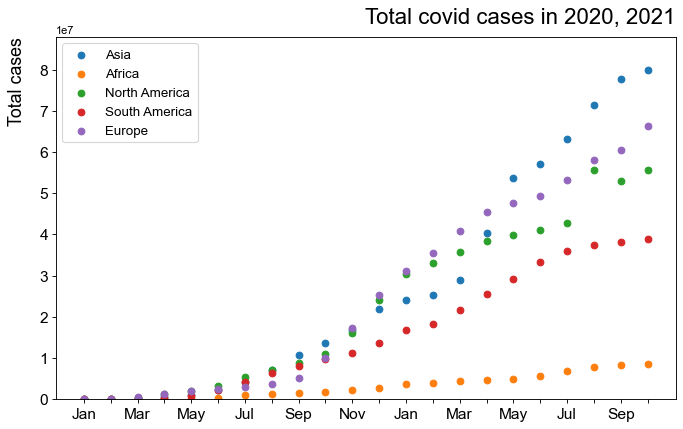

In [21]:
labels = ['', 'Total cases', 'Total covid cases in 2020, 2021', continents]

x = []
y = [total_cases_Asia[ : 22], total_cases_Africa[ : 22], total_cases_NA[ : 22], 
     total_cases_SA[ : 22], total_cases_Europe[ : 22]]

for i in range(5):
    x.append(months_list[ : 22])
    
yrange = [0, max(max(y))*1.1]
    
Helpers.largePlotterMultipleTicks(labels, x, y, yrange, xTick = [True, months_list[:22], months_labels[:22]])

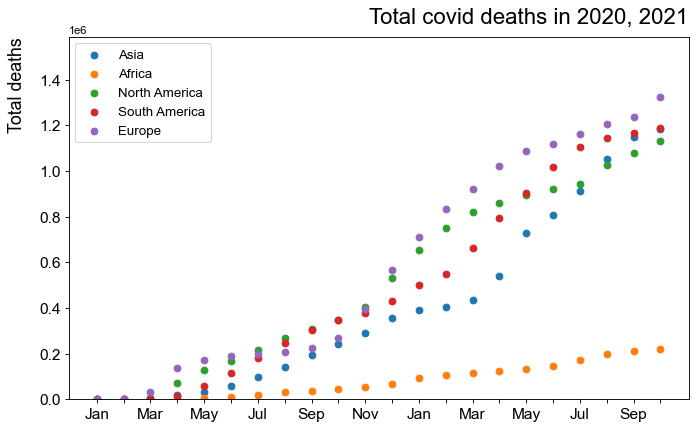

In [41]:
labels = ['', 'Total deaths', 'Total covid deaths in 2020, 2021', continents]

x = []
y = [total_deaths_Asia[ : 22], total_deaths_Africa[ : 22], total_deaths_NA[ : 22], 
     total_deaths_SA[ : 22], total_deaths_Europe[ : 22]]

for i in range(5):
    x.append(months_list[ : 22])
    
yrange = [0, max(max(y))*1.2]
    
Helpers.largePlotterMultipleTicks(labels, x, y, yrange, xTick = [True, months_list[ : 22], months_labels[ : 22]])

In [20]:
# Write data to Tableau-friendly csv format
outputFile = open("covid_data.csv", "w")
outputWriter = csv.writer(outputFile, lineterminator="\n")
outputWriter.writerow([ "Date", "Continent", "Total Cases", "Total Deaths" ])  # Column headers

for cont in continents:
    for index, date in enumerate(months_list):
        
        if index == 22: break  # Stop at Octobor 2021, since Nov/Dec 2021 data is not complete.
        
        if index < 12: i = 0   # At 2021, loop back to January in dictionaries.
        else: i = 1
    
        if cont == 'Asia':
            outputWriter.writerow([ date, cont, casesByMonth_Asia[date[5:]][i], deathsByMonth_Asia[date[5:]][i] ])  # writerow only takes list arguments
            
        elif cont == 'Africa':
            outputWriter.writerow([ date, cont, casesByMonth_Africa[date[5:]][i], deathsByMonth_[date[5:]][i] ])  
            
        elif cont == 'North America':
            outputWriter.writerow([ date, cont, casesByMonth_NA[date[5:]][i] ]) 
            
        elif cont == 'South America':
            outputWriter.writerow([ date, cont, casesByMonth_SA[date[5:]][i] ]) 
            
        elif cont == 'Europe':
            outputWriter.writerow([ date, cont, casesByMonth_Europe[date[5:]][i] ])  


outputFile.close()

NameError: name 'casesByMonth_Asia' is not defined